In [27]:
import json
import re
import pandas as pd
import numpy as np
import scrapy
import matplotlib.pyplot as plt
import copy
from pandas.testing import assert_frame_equal # to compare two dataframes
# YOUR CODE HERE (OPTION) 
# Nếu cần các thư viện khác thì bạn có thể import thêm tại đây

In [20]:
df=pd.read_json('film_crawler/film_crawler/dataset/data_film.json',encoding='utf-8-sig')
display(df)

,Name,Published Year,Rated,Duration,Genres,Director,Writers,Stars,User_reviews,Critic_reviews,IMDb RATING,Popularity,Meta score,Wins
0,The Godfather,1972.0,R,"[2, h, , 55, m]","[Crime, Drama]",[Francis Ford Coppola],"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]",5.2K,192,9.2,65,100.0,Won 3 Oscars
1,Goodfellas,1990.0,R,"[2, h, , 25, m]","[Biography, Crime, Drama]",[Martin Scorsese],"[Nicholas Pileggi, Martin Scorsese]","[Robert De Niro, Ray Liotta, Joe Pesci]",1.5K,163,8.7,135,90.0,Won 1 Oscar
2,Pulp Fiction,1994.0,R,"[2, h, , 34, m]","[Crime, Drama]",[Quentin Tarantino],"[Quentin Tarantino, Roger Avary]","[John Travolta, Uma Thurman, Samuel L. Jackson]",3.5K,299,8.9,99,94.0,Won 1 Oscar
3,The Usual Suspects,1995.0,R,"[1, h, , 46, m]","[Crime, Drama, Mystery]",[Bryan Singer],[Christopher McQuarrie],"[Kevin Spacey, Gabriel Byrne, Chazz Palminteri]",1.4K,154,8.5,454,77.0,Won 2 Oscars
4,Apocalypse Now,1979.0,R,"[2, h, , 27, m]","[Drama, Mystery, War]",[Francis Ford Coppola],"[John Milius, Francis Ford Coppola, Michael Herr]","[Martin Sheen, Marlon Brando, Robert Duvall]",1.3K,302,8.5,287,94.0,Won 2 Oscars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Blade II,2002.0,R,"[1, h, , 57, m]","[Action, Horror, Sci-Fi]",[Guillermo del Toro],"[Marv Wolfman, Gene Colan, David S. Goyer]","[Wesley Snipes, Kris Kristofferson, Ron Perlman]",613,221,6.7,"2,280",52.0,Awards
996,Falling Down,1993.0,R,"[1, h, , 53, m]","[Action, Crime, Drama]",[Joel Schumacher],[Ebbe Roe Smith],"[Michael Douglas, Robert Duvall, Barbara Hershey]",523,96,7.6,"1,809",56.0,Awards
997,Eyes Wide Shut,1999.0,TV-MA,"[2, h, , 39, m]","[Drama, Mystery, Thriller]",[Stanley Kubrick],"[Stanley Kubrick, Frederic Raphael, Arthur Sch...","[Tom Cruise, Nicole Kidman, Todd Field]",1.7K,284,7.5,269,68.0,Awards
998,The Lost Boys,1987.0,R,"[1, h, , 37, m]","[Comedy, Horror]",[Joel Schumacher],"[Jan Fischer, James Jeremias, Jeffrey Boam]","[Jason Patric, Corey Haim, Dianne Wiest]",486,174,7.2,873,63.0,Awards


## Câu hỏi 3:

### Liệu phim của những diễn viên có tần suất xuất hiện nhiều phim trong danh sách nhất có còn trending ở thời điểm hiện tại không?

#### Bước 1: Tìm tên 5 diễn viên có nhiều bộ phim hay nhất

In [21]:
d=copy.deepcopy(df['Stars'])

list_stars=[]
for i in d:
    list_stars.extend(i)

list_stars=pd.DataFrame(list_stars)
count=list_stars.value_counts()
top_star=[]
count
list_stars=count.keys()
list_stars
for i in range(5):
    top_star.append(list_stars[i][0])
print(top_star)


['Robert De Niro', 'Tom Cruise', 'Tom Hanks', 'Al Pacino', 'Brad Pitt']


#### Bước 2: Tìm tên những bộ phim hay của từng diễn viên đã đóng.

In [22]:
def findFilm(df,name):
    list_idx=[]
    idx=0
    for stars in df['Stars']:
        # print(stars)
        if name in stars:
            list_idx.append(idx)
        idx+=1
    list_film=[]
    for i in range(len(list_idx)):
        list_film.append(df['Name'][list_idx[i]])
    return list_film
top_1=findFilm(df,top_star[0])
top_2=findFilm(df,top_star[1])
top_3=findFilm(df,top_star[2])
top_4=findFilm(df,top_star[3])
top_5=findFilm(df,top_star[4])

print(f'Những bộ phim do diễn viên {top_star[0]} đóng:')
for i in top_1:
    print(f'\t{i}')
print()

print(f'Những bộ phim do diễn viên {top_star[1]} đóng:')
for i in top_2:
    print(f'\t{i}')
print()

print(f'Những bộ phim do diễn viên {top_star[2]} đóng:')
for i in top_3:
    print(f'\t{i}')
print()

print(f'Những bộ phim do diễn viên {top_star[3]} đóng:')
for i in top_4:
    print(f'\t{i}')
print()

print(f'Những bộ phim do diễn viên {top_star[4]} đóng:')
for i in top_5:
    print(f'\t{i}')
print()


Những bộ phim do diễn viên Robert De Niro đóng:
	Goodfellas
	Taxi Driver
	The Godfather Part II
	Heat
	Raging Bull
	Once Upon a Time in America
	Casino
	The Untouchables
	The Deer Hunter
	Meet the Parents
	The Irishman
	Brazil
	A Bronx Tale
	Midnight Run
	Silver Linings Playbook
	Angel Heart
	Sleepers
	The King of Comedy
	Wag the Dog
	Machete
	Cape Fear
	Awakenings
	Ronin
	Mean Streets
	Analyze This

Những bộ phim do diễn viên Tom Cruise đóng:
	Magnolia
	Rain Man
	Minority Report
	The Color of Money
	Interview with the Vampire: The Vampire Chronicles
	Top Gun
	Jerry Maguire
	Mission: Impossible - Ghost Protocol
	Mission: Impossible
	Collateral
	Edge of Tomorrow
	Mission: Impossible - Fallout
	War of the Worlds
	Born on the Fourth of July
	A Few Good Men
	Mission: Impossible III
	Mission: Impossible II
	Risky Business
	Mission: Impossible - Rogue Nation
	Eyes Wide Shut

Những bộ phim do diễn viên Tom Hanks đóng:
	Toy Story
	The Green Mile
	Forrest Gump
	Toy Story 2
	Saving Private Ryan


#### Tiền xử lý

Vì cột `Popularity` của dataframe `df` không phải dạng float hay int và tồn tại dấu phẩy với những số phần ngàn nên ta không thể tính toán được.

Thế nên, ta cần tiến hành xử lý vấn đề này

In [23]:
def handlePopularity(df):
    for i in range(1000):
        if df['Popularity'].values[i]:
            if len(df['Popularity'].values[i])>3:
                df['Popularity'].values[i]=df['Popularity'].values[i].replace(',','')

handlePopularity(df)
df = df.fillna(value=0)


# print(df['Popularity'])
df['Popularity']=df['Popularity'].astype(int)
df['Popularity']

0        65
1       135
2        99
3       454
4       287
       ... 
995    2280
996    1809
997     269
998     873
999     377
Name: Popularity, Length: 1000, dtype: int64

#### Tính bình quân điểm `popularity` của các bộ phim của từng diễn viên và lưu vào list `average_popularity_top`.

In [24]:
def averagePopularity(df,list_film):
    list_popularity=[]
    for name in list_film:
        temp=df.loc[df['Name']==name]
        # temp=pd.DataFrame(temp)
        temp=temp['Popularity']
        list_popularity.append(temp.values[0])
    return sum(list_popularity)/len(list_popularity)

avarage_popularity_top=[]
avarage_popularity_top.append(averagePopularity(df,top_1))
avarage_popularity_top.append(averagePopularity(df,top_2))
avarage_popularity_top.append(averagePopularity(df,top_3))
avarage_popularity_top.append(averagePopularity(df,top_4))
avarage_popularity_top.append(averagePopularity(df,top_5))
avarage_popularity_top

[1650.12, 1560.1, 1048.2142857142858, 1315.2142857142858, 860.3333333333334]

Để biết được những phim của diễn viên đó còn trend không, ta cần tiến hành so sánh bình quân điểm `popularity` so với tổng bình quân điểm `popularity` của toàn bộ danh sách phim.
#### Tính tổng bình quân điểm `popularity` của toàn bộ danh sách phim và lưu vào biến `average_popularity`.

In [25]:
average_popularity=df['Popularity'].sum()/1000
average_popularity

1347.452

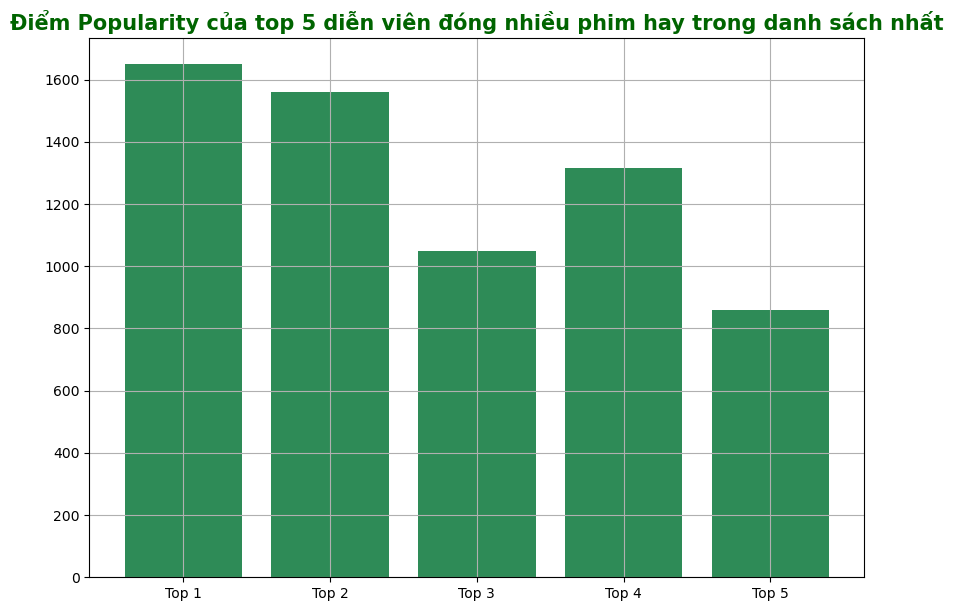

In [42]:
bar_width=0.5
xs=['Top 1','Top 2','Top 3','Top 4', 'Top 5']
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.title('Điểm Popularity của top 5 diễn viên đóng nhiều phim hay trong danh sách nhất',
          color='darkgreen',fontweight='bold',fontsize=15)
plt.bar(xs,avarage_popularity_top,color='seagreen')
plt.grid()
# Show Plot
plt.show()